# llc4320 drifters spectra: Lagrangian vs Eulerian

In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import dask.dataframe as dd
from xhistogram.xarray import histogram
%matplotlib inline
from matplotlib import pyplot as plt
from cmocean import cm
import matplotlib.colors as colors

import mitequinox.utils as ut
import mitequinox.parcels as pa
import mitequinox.drifters as dr

INFO: Compiled ParcelsRandom ==> /dev/shm/pbs.6288085.datarmor0/parcels-502027/libparcels_random_cc51c72f-bba8-4050-bf17-5cb1f92e104c.so


In [2]:
if True:
    from dask.distributed import Client, LocalCluster
    from dask_jobqueue import PBSCluster
    #cluster = PBSCluster()
    cluster = PBSCluster(cores=28, processes=14) # necessary?
    w = cluster.scale(jobs=1)
    client = Client(cluster)
    client
else:
    from dask.distributed import Client, LocalCluster
    #
    cluster = LocalCluster()
    client = Client(cluster)
    client

In [3]:
client

Client Scheduler: tcp://10.148.0.123:44044 Dashboard: http://10.148.0.123:8787/status,Cluster Workers: 14 Cores: 28 Memory: 111.72 GiB


________
# Read zonally-averaged LLC4320 spectra 
## (1) both Lag. and Eul.
## (2) as a function of lat

In [4]:
root_dir = '/home/datawork-lops-osi/equinox/mit4320/parcels/'
run_name = 'global_T365j_dt1j_dij50'
p = pa.parcels_output(root_dir+run_name, parquets=['trajectory'])

In [5]:
# load raw spectra
ds_L = (p.load_diagnostic('spectra_uv_T60_mean0_lat_from_2Dbinned_spectra.zarr')
        .rename({'E':'E_Lagrangian'})
       )

ds_E = (xr.open_zarr(os.path.join(ut.root_data_dir,'diags/SSUV_T60_lat.zarr'))
        .rename({'E_SSUV_T60': 'E_Eulerian'})
       )

ds = xr.merge([ds_L, ds_E])
ds

<xarray.Dataset>
Dimensions:       (frequency: 1440, lat_bins: 119)
Coordinates:
  * frequency     (frequency) float64 -12.0 -11.98 -11.97 ... 11.95 11.97 11.98
  * lat_bins      (lat_bins) float64 -59.5 -58.5 -57.5 -56.5 ... 56.5 57.5 58.5
Data variables:
    E_Lagrangian  (lat_bins, frequency) float64 dask.array<chunksize=(119, 100), meta=np.ndarray>
    E_Eulerian    (frequency, lat_bins) float64 dask.array<chunksize=(1440, 119), meta=np.ndarray>

In [6]:
# load spectra (with detrending)
ds_L_nomean = (p.load_diagnostic('spectra_uv_T60_mean1_lat_from_2Dbinned_spectra.zarr')
        .rename({'E':'E_Lagrangian'})
       )

ds_E_nomean = (xr.open_zarr(os.path.join(ut.root_data_dir,'diags/SSUV_T60_nomean_lat.zarr'))
        .rename({'E_SSUV_T60_nomean': 'E_Eulerian'})
       )

ds_nomean = xr.merge([ds_L_nomean, ds_E_nomean])
ds_nomean

<xarray.Dataset>
Dimensions:       (frequency: 1440, lat_bins: 119)
Coordinates:
  * frequency     (frequency) float64 -12.0 -11.98 -11.97 ... 11.95 11.97 11.98
  * lat_bins      (lat_bins) float64 -59.5 -58.5 -57.5 -56.5 ... 56.5 57.5 58.5
Data variables:
    E_Lagrangian  (lat_bins, frequency) float64 dask.array<chunksize=(119, 100), meta=np.ndarray>
    E_Eulerian    (frequency, lat_bins) float64 dask.array<chunksize=(1440, 119), meta=np.ndarray>

## Plots of rotary spectra

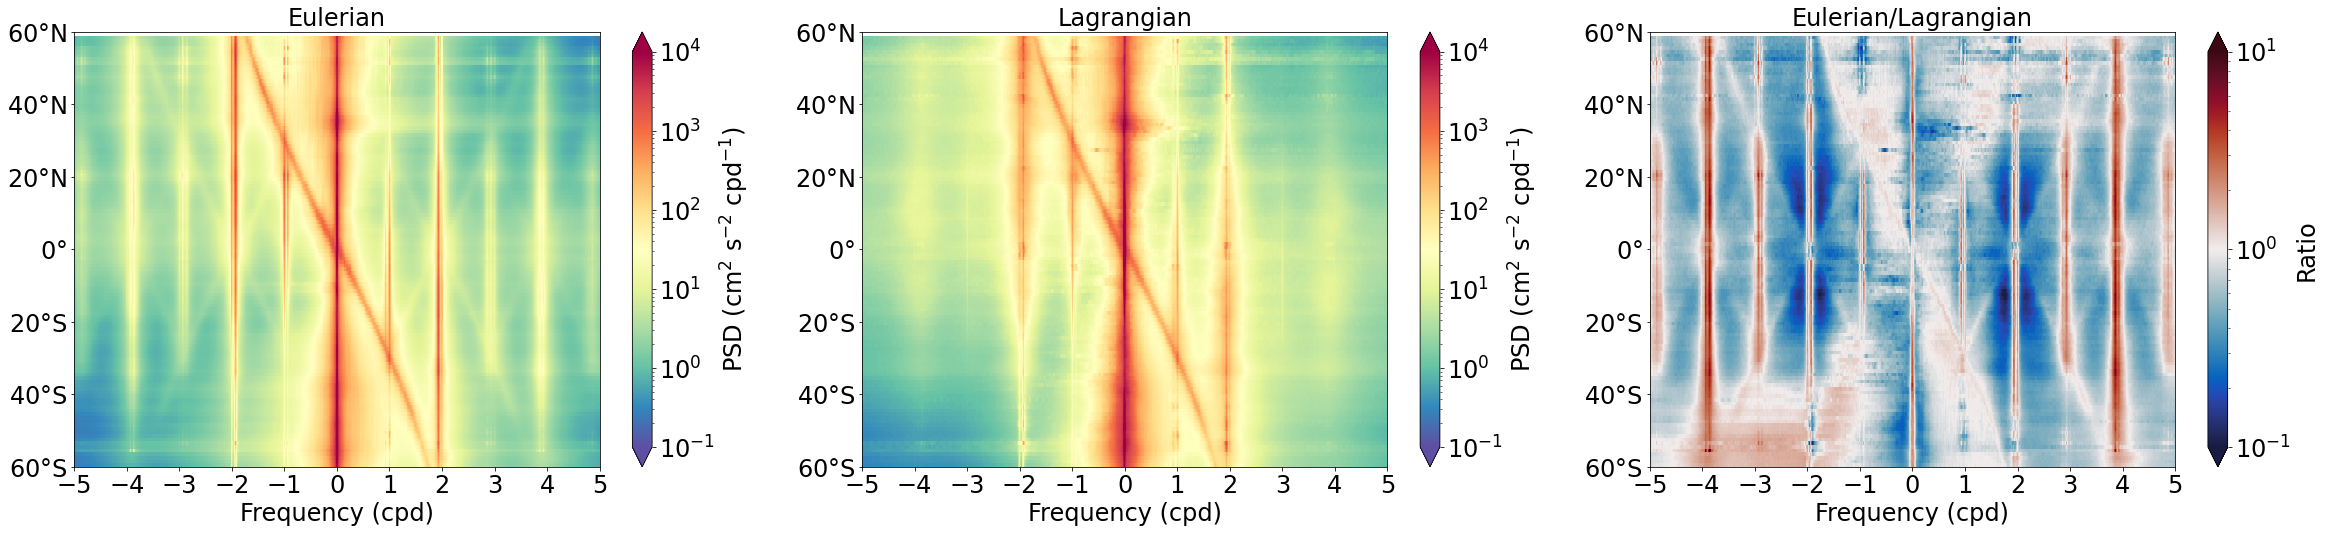

In [7]:
font_size = 24
fig, ax = plt.subplots(figsize=(40,8))

# LLC4320 Eulerian
ax = plt.subplot(1,3,1)
cax = (ds['E_Eulerian']*86400/6).plot.pcolormesh(ax=ax, x='frequency', y='lat_bins', cmap = 'Spectral_r', norm=colors.LogNorm(vmin=1e-1, vmax=1e4), add_colorbar = False)
# colorbar
cbar = plt.colorbar(cax, ax=ax, extend='both', orientation='vertical')
cbar.ax.tick_params(labelsize=font_size)
cbar.set_label('PSD (cm$^2$ s$^{-2}$ cpd$^{-1}$)', fontsize=font_size)
# x,y ticks
ax.set_xticks(list(ax.get_xticks()) + [-4., -3., -2., -1., 1., 2., 3., 4.])
ax.set_xlim(-5., 5.)
ax.set_ylim(-60., 60.)
ax.set_yticks([-60., -40., -20., 0., 20., 40., 60.])
#ax.set_yticklabels(['60S','40S','20S','0','20N','40N','60N'])
ax.set_yticklabels(['$60\degree$S','$40\degree$S','$20\degree$S','$0\degree$','$20\degree$N','$40\degree$N','$60\degree$N'])
ax.set_ylabel('',fontsize=font_size)
ax.set_xlabel('Frequency (cpd)',fontsize=font_size)
ax.tick_params(labelsize=24)
ax.set_title('Eulerian',fontsize=font_size)

# LLC420 Lagrangian
ax = plt.subplot(1,3,2)
cax = (ds['E_Lagrangian']*86400/6).plot.pcolormesh(ax=ax, x='frequency', y='lat_bins', cmap = 'Spectral_r', norm=colors.LogNorm(vmin=1e-1, vmax=1e4), add_colorbar = False)
# colorbar
cbar = plt.colorbar(cax, ax=ax, extend='both', orientation='vertical')
cbar.ax.tick_params(labelsize=font_size)
cbar.set_label('PSD (cm$^2$ s$^{-2}$ cpd$^{-1}$)', fontsize=font_size)
# x,y ticks
ax.set_xticks(list(ax.get_xticks()) + [-4., -3., -2., -1., 1., 2., 3., 4.])
ax.set_xlim(-5., 5.)
ax.set_ylim(-60., 60.)
ax.set_yticks([-60., -40., -20., 0., 20., 40., 60.])
#ax.set_yticklabels(['60S','40S','20S','0','20N','40N','60N'])
ax.set_yticklabels(['$60\degree$S','$40\degree$S','$20\degree$S','$0\degree$','$20\degree$N','$40\degree$N','$60\degree$N'])
ax.set_ylabel('',fontsize=font_size)
ax.set_xlabel('Frequency (cpd)',fontsize=font_size)
ax.tick_params(labelsize=font_size)
# add coriolis frequency
ax.set_title('Lagrangian',fontsize=font_size)

# Ratio
ax = plt.subplot(1,3,3)
cax = (ds['E_Eulerian']/ds['E_Lagrangian']).plot.pcolormesh(ax=ax, x='frequency', y='lat_bins', cmap=cm.balance, norm=colors.LogNorm(vmin=1e-1, vmax=1e1), add_colorbar = False)
# colorbar
cbar = plt.colorbar(cax, ax=ax, extend='both', orientation='vertical')
cbar.ax.tick_params(labelsize=font_size)
cbar.set_label('Ratio', fontsize=font_size)
# x,y ticks
ax.set_xticks(list(ax.get_xticks()) + [-4., -3., -2., -1., 1., 2., 3., 4.])
ax.set_xlim(-5., 5.)
ax.set_ylim(-60., 60.)
ax.set_yticks([-60., -40., -20., 0., 20., 40., 60.])
ax.set_yticklabels(['$60\degree$S','$40\degree$S','$20\degree$S','$0\degree$','$20\degree$N','$40\degree$N','$60\degree$N'])
ax.set_ylabel('',fontsize=font_size)
ax.set_xlabel('Frequency (cpd)',fontsize=font_size)
ax.tick_params(labelsize=font_size)
ax.set_title('Eulerian/Lagrangian',fontsize=font_size)

plt.savefig('/home1/datahome/xyu/equinox_working/Lagrangian_vs_Eulerian_LLC4320/Figures/Rotary_spectra_LLC_comparison.png')

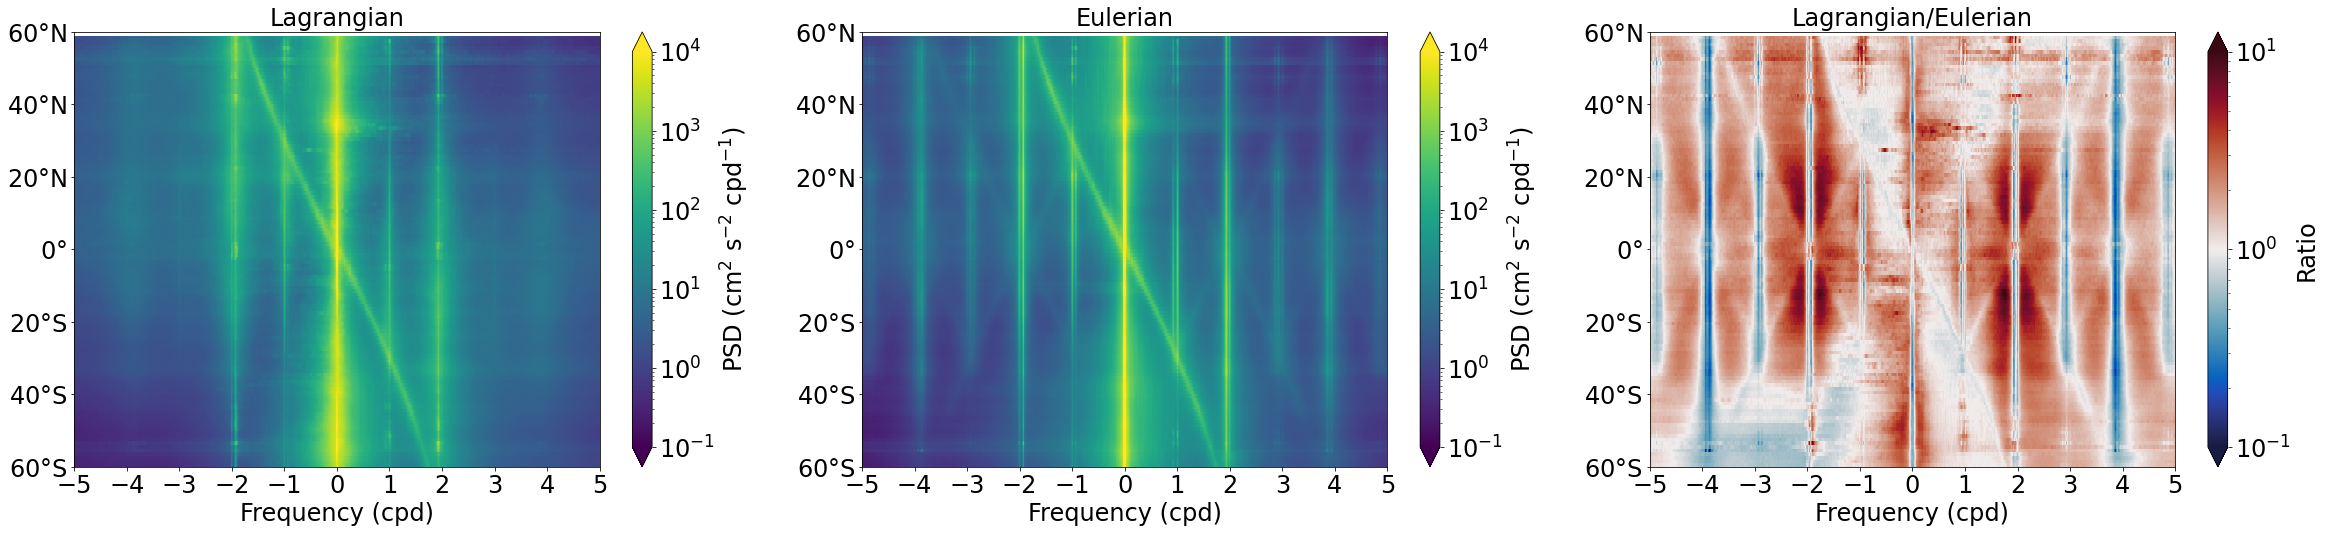

In [8]:
font_size = 24
fig, ax = plt.subplots(figsize=(40,8))

# LLC420 Lagrangian
ax = plt.subplot(1,3,1)
cax = (ds['E_Lagrangian']*86400/6).plot.pcolormesh(ax=ax, x='frequency', y='lat_bins', cmap = 'viridis', norm=colors.LogNorm(vmin=1e-1, vmax=1e4), add_colorbar = False)
# colorbar
cbar = plt.colorbar(cax, ax=ax, extend='both', orientation='vertical')
cbar.ax.tick_params(labelsize=font_size)
cbar.set_label('PSD (cm$^2$ s$^{-2}$ cpd$^{-1}$)', fontsize=font_size)
# x,y ticks
ax.set_xticks(list(ax.get_xticks()) + [-4., -3., -2., -1., 1., 2., 3., 4.])
ax.set_xlim(-5., 5.)
ax.set_ylim(-60., 60.)
ax.set_yticks([-60., -40., -20., 0., 20., 40., 60.])
#ax.set_yticklabels(['60S','40S','20S','0','20N','40N','60N'])
ax.set_yticklabels(['$60\degree$S','$40\degree$S','$20\degree$S','$0\degree$','$20\degree$N','$40\degree$N','$60\degree$N'])
ax.set_ylabel('',fontsize=font_size)
ax.set_xlabel('Frequency (cpd)',fontsize=font_size)
ax.tick_params(labelsize=font_size)
# add coriolis frequency
ax.set_title('Lagrangian',fontsize=font_size)

# LLC4320 Eulerian
ax = plt.subplot(1,3,2)
cax = (ds['E_Eulerian']*86400/6).plot.pcolormesh(ax=ax, x='frequency', y='lat_bins', cmap = 'viridis', norm=colors.LogNorm(vmin=1e-1, vmax=1e4), add_colorbar = False)
# colorbar
cbar = plt.colorbar(cax, ax=ax, extend='both', orientation='vertical')
cbar.ax.tick_params(labelsize=font_size)
cbar.set_label('PSD (cm$^2$ s$^{-2}$ cpd$^{-1}$)', fontsize=font_size)
# x,y ticks
ax.set_xticks(list(ax.get_xticks()) + [-4., -3., -2., -1., 1., 2., 3., 4.])
ax.set_xlim(-5., 5.)
ax.set_ylim(-60., 60.)
ax.set_yticks([-60., -40., -20., 0., 20., 40., 60.])
#ax.set_yticklabels(['60S','40S','20S','0','20N','40N','60N'])
ax.set_yticklabels(['$60\degree$S','$40\degree$S','$20\degree$S','$0\degree$','$20\degree$N','$40\degree$N','$60\degree$N'])
ax.set_ylabel('',fontsize=font_size)
ax.set_xlabel('Frequency (cpd)',fontsize=font_size)
ax.tick_params(labelsize=24)
ax.set_title('Eulerian',fontsize=font_size)

# Ratio
ax = plt.subplot(1,3,3)
cax = (ds['E_Lagrangian']/ds['E_Eulerian']).plot.pcolormesh(ax=ax, x='frequency', y='lat_bins', cmap=cm.balance, norm=colors.LogNorm(vmin=1e-1, vmax=1e1), add_colorbar = False)
# colorbar
cbar = plt.colorbar(cax, ax=ax, extend='both', orientation='vertical')
cbar.ax.tick_params(labelsize=font_size)
cbar.set_label('Ratio', fontsize=font_size)
# x,y ticks
ax.set_xticks(list(ax.get_xticks()) + [-4., -3., -2., -1., 1., 2., 3., 4.])
ax.set_xlim(-5., 5.)
ax.set_ylim(-60., 60.)
ax.set_yticks([-60., -40., -20., 0., 20., 40., 60.])
ax.set_yticklabels(['$60\degree$S','$40\degree$S','$20\degree$S','$0\degree$','$20\degree$N','$40\degree$N','$60\degree$N'])
ax.set_ylabel('',fontsize=font_size)
ax.set_xlabel('Frequency (cpd)',fontsize=font_size)
ax.tick_params(labelsize=font_size)
ax.set_title('Lagrangian/Eulerian',fontsize=font_size)

plt.savefig('/home1/datahome/xyu/equinox_working/Lagrangian_vs_Eulerian_LLC4320/Figures/Rotary_spectra_LLC_comparison_viridis.png')

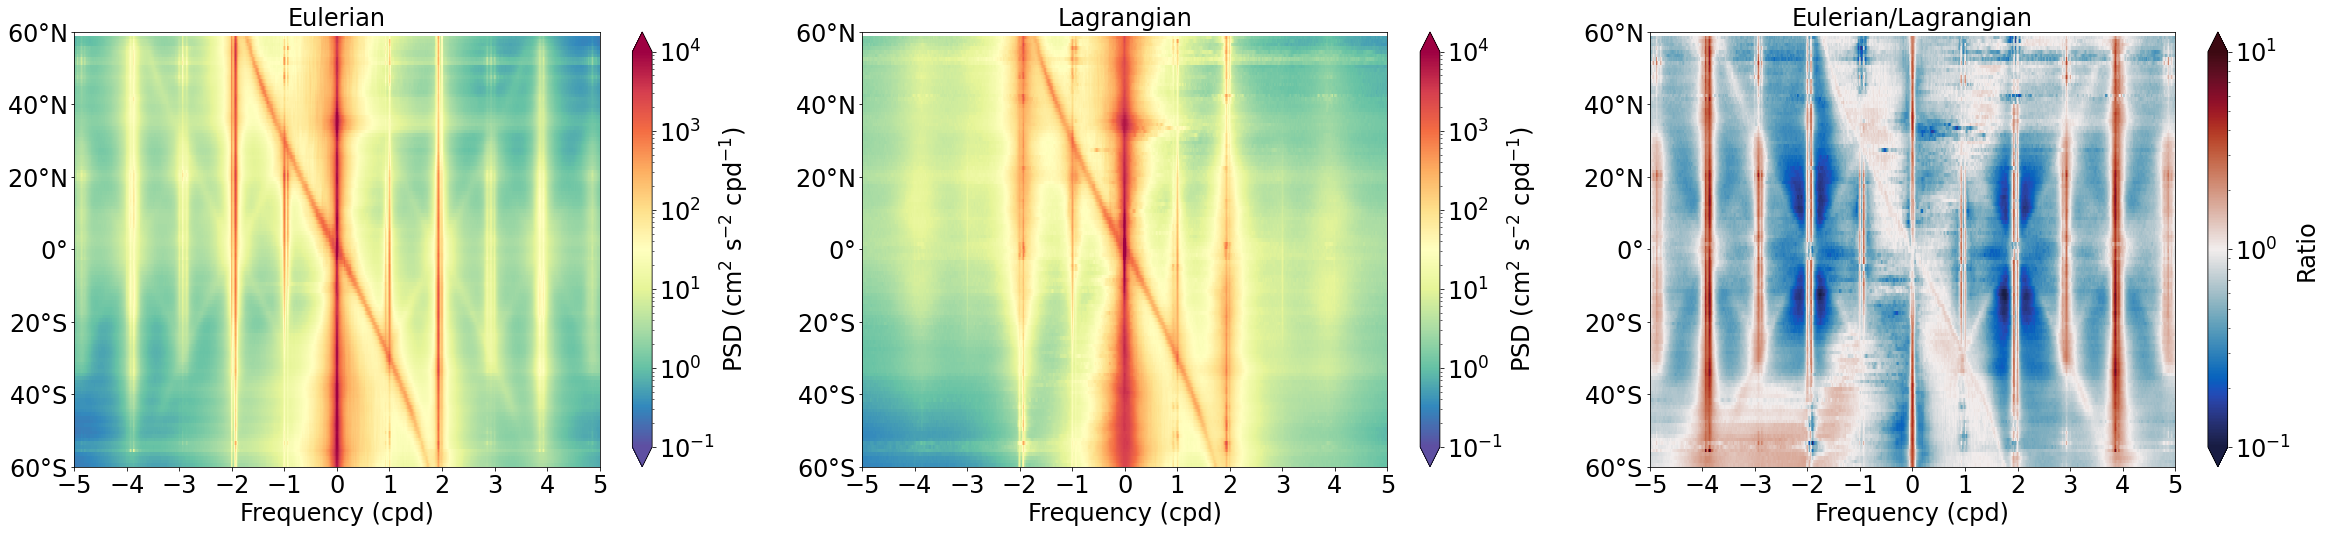

In [9]:
# detrended spectra

font_size = 24
fig, ax = plt.subplots(figsize=(40,8))

# LLC4320 Eulerian
ax = plt.subplot(1,3,1)
cax = (ds_nomean['E_Eulerian']*86400/6).plot.pcolormesh(ax=ax, x='frequency', y='lat_bins', cmap = 'Spectral_r', norm=colors.LogNorm(vmin=1e-1, vmax=1e4), add_colorbar = False)
# colorbar
cbar = plt.colorbar(cax, ax=ax, extend='both', orientation='vertical')
cbar.ax.tick_params(labelsize=font_size)
cbar.set_label('PSD (cm$^2$ s$^{-2}$ cpd$^{-1}$)', fontsize=font_size)
# x,y ticks
ax.set_xticks(list(ax.get_xticks()) + [-4., -3., -2., -1., 1., 2., 3., 4.])
ax.set_xlim(-5., 5.)
ax.set_ylim(-60., 60.)
ax.set_yticks([-60., -40., -20., 0., 20., 40., 60.])
#ax.set_yticklabels(['60S','40S','20S','0','20N','40N','60N'])
ax.set_yticklabels(['$60\degree$S','$40\degree$S','$20\degree$S','$0\degree$','$20\degree$N','$40\degree$N','$60\degree$N'])
ax.set_ylabel('',fontsize=font_size)
ax.set_xlabel('Frequency (cpd)',fontsize=font_size)
ax.tick_params(labelsize=24)
ax.set_title('Eulerian',fontsize=font_size)

# LLC420 Lagrangian
ax = plt.subplot(1,3,2)
cax = (ds_nomean['E_Lagrangian']*86400/6).plot.pcolormesh(ax=ax, x='frequency', y='lat_bins', cmap = 'Spectral_r', norm=colors.LogNorm(vmin=1e-1, vmax=1e4), add_colorbar = False)
# colorbar
cbar = plt.colorbar(cax, ax=ax, extend='both', orientation='vertical')
cbar.ax.tick_params(labelsize=font_size)
cbar.set_label('PSD (cm$^2$ s$^{-2}$ cpd$^{-1}$)', fontsize=font_size)
# x,y ticks
ax.set_xticks(list(ax.get_xticks()) + [-4., -3., -2., -1., 1., 2., 3., 4.])
ax.set_xlim(-5., 5.)
ax.set_ylim(-60., 60.)
ax.set_yticks([-60., -40., -20., 0., 20., 40., 60.])
#ax.set_yticklabels(['60S','40S','20S','0','20N','40N','60N'])
ax.set_yticklabels(['$60\degree$S','$40\degree$S','$20\degree$S','$0\degree$','$20\degree$N','$40\degree$N','$60\degree$N'])
ax.set_ylabel('',fontsize=font_size)
ax.set_xlabel('Frequency (cpd)',fontsize=font_size)
ax.tick_params(labelsize=font_size)
# add coriolis frequency
ax.set_title('Lagrangian',fontsize=font_size)

# Ratio
ax = plt.subplot(1,3,3)
cax = (ds_nomean['E_Eulerian']/ds_nomean['E_Lagrangian']).plot.pcolormesh(ax=ax, x='frequency', y='lat_bins', cmap=cm.balance, norm=colors.LogNorm(vmin=1e-1, vmax=1e1), add_colorbar = False)
# colorbar
cbar = plt.colorbar(cax, ax=ax, extend='both', orientation='vertical')
cbar.ax.tick_params(labelsize=font_size)
cbar.set_label('Ratio', fontsize=font_size)
# x,y ticks
ax.set_xticks(list(ax.get_xticks()) + [-4., -3., -2., -1., 1., 2., 3., 4.])
ax.set_xlim(-5., 5.)
ax.set_ylim(-60., 60.)
ax.set_yticks([-60., -40., -20., 0., 20., 40., 60.])
ax.set_yticklabels(['$60\degree$S','$40\degree$S','$20\degree$S','$0\degree$','$20\degree$N','$40\degree$N','$60\degree$N'])
ax.set_ylabel('',fontsize=font_size)
ax.set_xlabel('Frequency (cpd)',fontsize=font_size)
ax.tick_params(labelsize=font_size)
ax.set_title('Eulerian/Lagrangian',fontsize=font_size)

plt.savefig('/home1/datahome/xyu/equinox_working/Lagrangian_vs_Eulerian_LLC4320/Figures/Rotary_spectra_LLC_comparison_detrend.png')

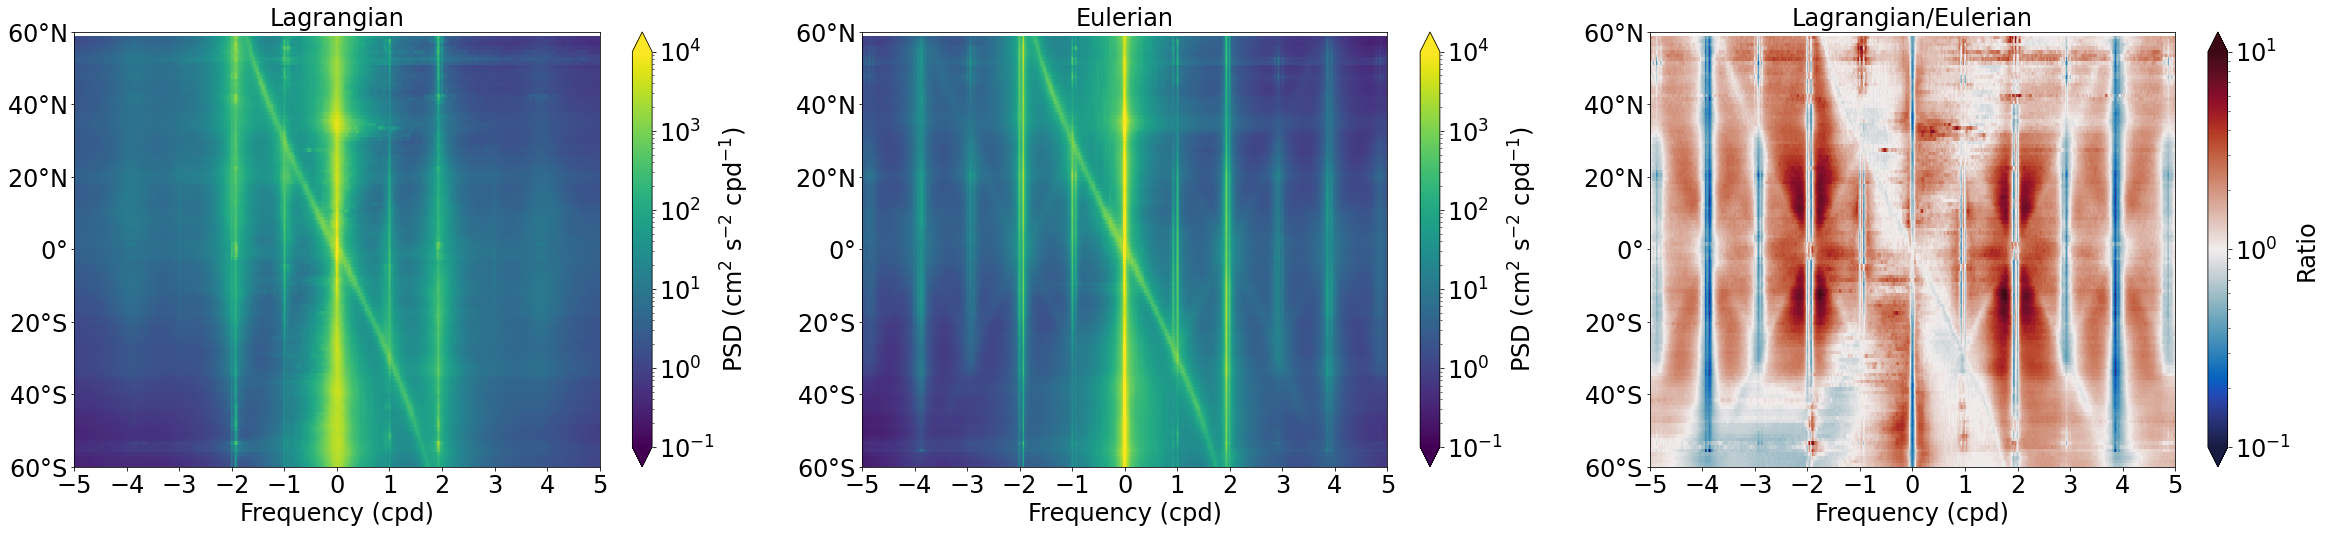

In [10]:
# detrended spectra

font_size = 24
fig, ax = plt.subplots(figsize=(40,8))

# LLC420 Lagrangian
ax = plt.subplot(1,3,1)
cax = (ds_nomean['E_Lagrangian']*86400/6).plot.pcolormesh(ax=ax, x='frequency', y='lat_bins', cmap = 'viridis', norm=colors.LogNorm(vmin=1e-1, vmax=1e4), add_colorbar = False)
# colorbar
cbar = plt.colorbar(cax, ax=ax, extend='both', orientation='vertical')
cbar.ax.tick_params(labelsize=font_size)
cbar.set_label('PSD (cm$^2$ s$^{-2}$ cpd$^{-1}$)', fontsize=font_size)
# x,y ticks
ax.set_xticks(list(ax.get_xticks()) + [-4., -3., -2., -1., 1., 2., 3., 4.])
ax.set_xlim(-5., 5.)
ax.set_ylim(-60., 60.)
ax.set_yticks([-60., -40., -20., 0., 20., 40., 60.])
#ax.set_yticklabels(['60S','40S','20S','0','20N','40N','60N'])
ax.set_yticklabels(['$60\degree$S','$40\degree$S','$20\degree$S','$0\degree$','$20\degree$N','$40\degree$N','$60\degree$N'])
ax.set_ylabel('',fontsize=font_size)
ax.set_xlabel('Frequency (cpd)',fontsize=font_size)
ax.tick_params(labelsize=font_size)
# add coriolis frequency
ax.set_title('Lagrangian',fontsize=font_size)

# LLC4320 Eulerian
ax = plt.subplot(1,3,2)
cax = (ds_nomean['E_Eulerian']*86400/6).plot.pcolormesh(ax=ax, x='frequency', y='lat_bins', cmap = 'viridis', norm=colors.LogNorm(vmin=1e-1, vmax=1e4), add_colorbar = False)
# colorbar
cbar = plt.colorbar(cax, ax=ax, extend='both', orientation='vertical')
cbar.ax.tick_params(labelsize=font_size)
cbar.set_label('PSD (cm$^2$ s$^{-2}$ cpd$^{-1}$)', fontsize=font_size)
# x,y ticks
ax.set_xticks(list(ax.get_xticks()) + [-4., -3., -2., -1., 1., 2., 3., 4.])
ax.set_xlim(-5., 5.)
ax.set_ylim(-60., 60.)
ax.set_yticks([-60., -40., -20., 0., 20., 40., 60.])
#ax.set_yticklabels(['60S','40S','20S','0','20N','40N','60N'])
ax.set_yticklabels(['$60\degree$S','$40\degree$S','$20\degree$S','$0\degree$','$20\degree$N','$40\degree$N','$60\degree$N'])
ax.set_ylabel('',fontsize=font_size)
ax.set_xlabel('Frequency (cpd)',fontsize=font_size)
ax.tick_params(labelsize=24)
ax.set_title('Eulerian',fontsize=font_size)

# Ratio
ax = plt.subplot(1,3,3)
cax = (ds_nomean['E_Lagrangian']/ds_nomean['E_Eulerian']).plot.pcolormesh(ax=ax, x='frequency', y='lat_bins', cmap=cm.balance, norm=colors.LogNorm(vmin=1e-1, vmax=1e1), add_colorbar = False)
# colorbar
cbar = plt.colorbar(cax, ax=ax, extend='both', orientation='vertical')
cbar.ax.tick_params(labelsize=font_size)
cbar.set_label('Ratio', fontsize=font_size)
# x,y ticks
ax.set_xticks(list(ax.get_xticks()) + [-4., -3., -2., -1., 1., 2., 3., 4.])
ax.set_xlim(-5., 5.)
ax.set_ylim(-60., 60.)
ax.set_yticks([-60., -40., -20., 0., 20., 40., 60.])
ax.set_yticklabels(['$60\degree$S','$40\degree$S','$20\degree$S','$0\degree$','$20\degree$N','$40\degree$N','$60\degree$N'])
ax.set_ylabel('',fontsize=font_size)
ax.set_xlabel('Frequency (cpd)',fontsize=font_size)
ax.tick_params(labelsize=font_size)
ax.set_title('Lagrangian/Eulerian',fontsize=font_size)

plt.savefig('/home1/datahome/xyu/equinox_working/Lagrangian_vs_Eulerian_LLC4320/Figures/Rotary_spectra_LLC_comparison_detrend_viridis.png')

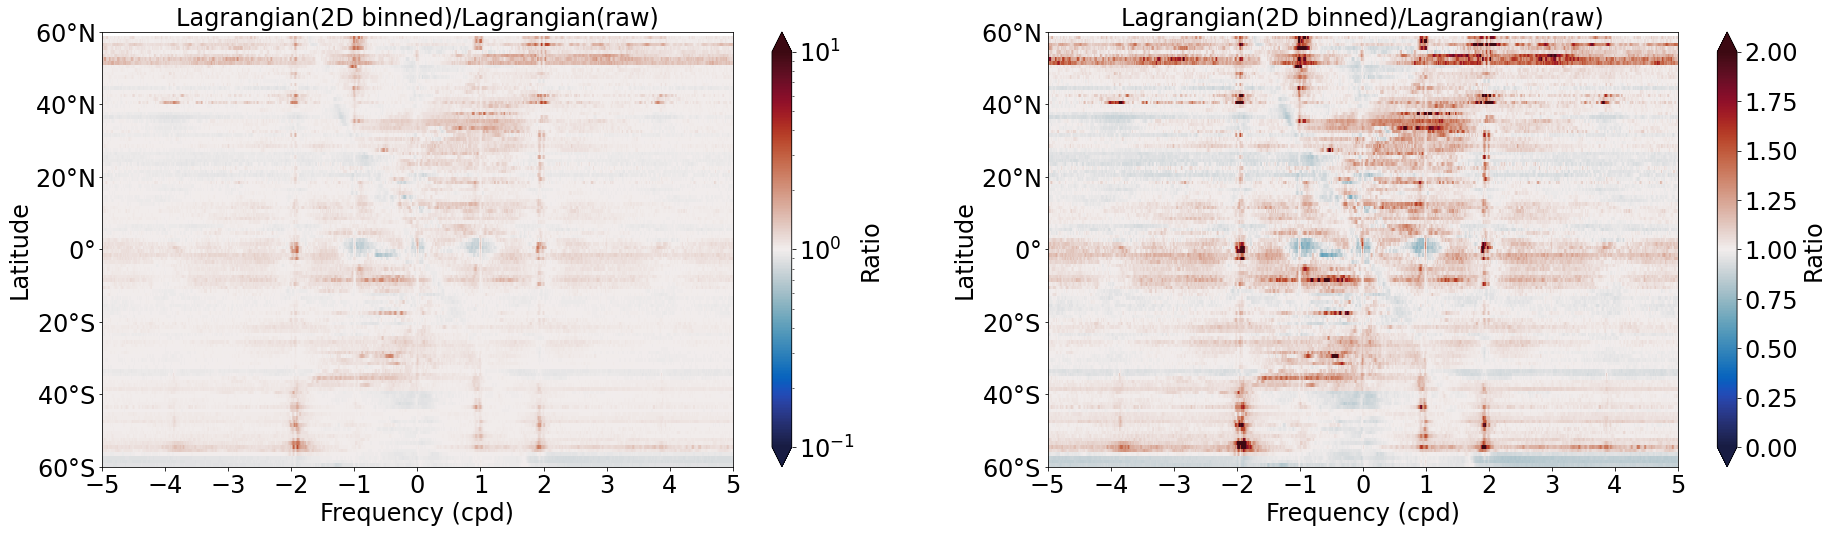

In [14]:
font_size = 24
fig, ax = plt.subplots(figsize=(48,8))

ax = plt.subplot(1,3,1)
cax = (ds_L_bin['E_Lagrangian']/ds['E_Lagrangian']).plot.pcolormesh(ax=ax, x='frequency', y='lat_bins', cmap=cm.balance, norm=colors.LogNorm(vmin=1e-1, vmax=1e1), add_colorbar = False)
# colorbar
cbar = plt.colorbar(cax, ax=ax, extend='both', orientation='vertical')
cbar.ax.tick_params(labelsize=font_size)
cbar.set_label('Ratio', fontsize=font_size)
# x,y ticks
ax.set_xticks(list(ax.get_xticks()) + [-4., -3., -2., -1., 1., 2., 3., 4.])
ax.set_xlim(-5., 5.)
ax.set_ylim(-60., 60.)
ax.set_yticks([-60., -40., -20., 0., 20., 40., 60.])
ax.set_yticklabels(['$60\degree$S','$40\degree$S','$20\degree$S','$0\degree$','$20\degree$N','$40\degree$N','$60\degree$N'])
ax.set_ylabel('Latitude',fontsize=font_size)
ax.set_xlabel('Frequency (cpd)',fontsize=font_size)
ax.tick_params(labelsize=font_size)
ax.set_title('Lagrangian(2D binned)/Lagrangian(raw)',fontsize=font_size)

ax = plt.subplot(1,3,2)
cax = (ds_L_bin['E_Lagrangian']/ds['E_Lagrangian']).plot.pcolormesh(ax=ax, x='frequency', y='lat_bins', cmap=cm.balance, vmin=0, vmax=2, add_colorbar = False)
# colorbar
cbar = plt.colorbar(cax, ax=ax, extend='both', orientation='vertical')
cbar.ax.tick_params(labelsize=font_size)
cbar.set_label('Ratio', fontsize=font_size)
# x,y ticks
ax.set_xticks(list(ax.get_xticks()) + [-4., -3., -2., -1., 1., 2., 3., 4.])
ax.set_xlim(-5., 5.)
ax.set_ylim(-60., 60.)
ax.set_yticks([-60., -40., -20., 0., 20., 40., 60.])
ax.set_yticklabels(['$60\degree$S','$40\degree$S','$20\degree$S','$0\degree$','$20\degree$N','$40\degree$N','$60\degree$N'])
ax.set_ylabel('Latitude',fontsize=font_size)
ax.set_xlabel('Frequency (cpd)',fontsize=font_size)
ax.tick_params(labelsize=font_size)
ax.set_title('Lagrangian(2D binned)/Lagrangian(raw)',fontsize=font_size)

plt.savefig('/home1/datahome/xyu/equinox_working/Lagrangian_vs_Eulerian_LLC4320/Figures/Rotary_spectra_LLC_Lagrangian_comparison.png')

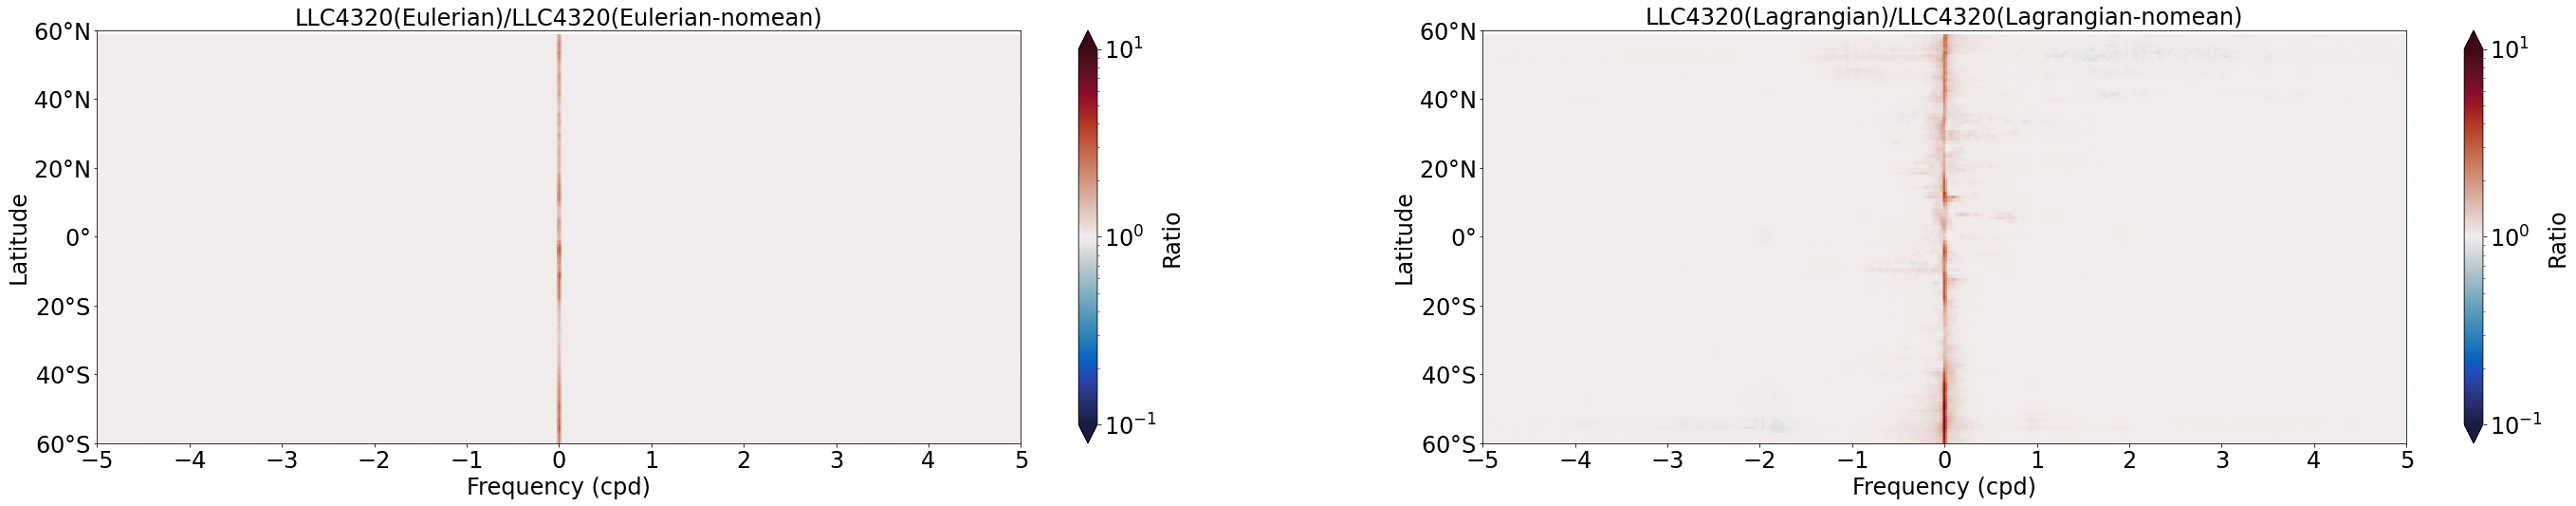

In [15]:
font_size = 24
fig, ax = plt.subplots(figsize=(48,8))

# Eulerian Ratio
ax = plt.subplot(1,2,1)
cax = (ds['E_Eulerian']/ds_nomean['E_Eulerian']).plot.pcolormesh(ax=ax, x='frequency', y='lat_bins', cmap=cm.balance, norm=colors.LogNorm(vmin=1e-1, vmax=1e1), add_colorbar = False)
# colorbar
cbar = plt.colorbar(cax, ax=ax, extend='both', orientation='vertical')
cbar.ax.tick_params(labelsize=font_size)
cbar.set_label('Ratio', fontsize=font_size)
# x,y ticks
ax.set_xticks(list(ax.get_xticks()) + [-4., -3., -2., -1., 1., 2., 3., 4.])
ax.set_xlim(-5., 5.)
ax.set_ylim(-60., 60.)
ax.set_yticks([-60., -40., -20., 0., 20., 40., 60.])
ax.set_yticklabels(['$60\degree$S','$40\degree$S','$20\degree$S','$0\degree$','$20\degree$N','$40\degree$N','$60\degree$N'])
ax.set_ylabel('Latitude',fontsize=font_size)
ax.set_xlabel('Frequency (cpd)',fontsize=font_size)
ax.tick_params(labelsize=font_size)
ax.set_title('LLC4320(Eulerian)/LLC4320(Eulerian-nomean)',fontsize=font_size)

# Lagrangian Ratio
ax = plt.subplot(1,2,2)
cax = (ds['E_Lagrangian']/ds_nomean['E_Lagrangian']).plot.pcolormesh(ax=ax, x='frequency', y='lat_bins', cmap=cm.balance, norm=colors.LogNorm(vmin=1e-1, vmax=1e1), add_colorbar = False)
# colorbar
cbar = plt.colorbar(cax, ax=ax, extend='both', orientation='vertical')
cbar.ax.tick_params(labelsize=font_size)
cbar.set_label('Ratio', fontsize=font_size)
# x,y ticks
ax.set_xticks(list(ax.get_xticks()) + [-4., -3., -2., -1., 1., 2., 3., 4.])
ax.set_xlim(-5., 5.)
ax.set_ylim(-60., 60.)
ax.set_yticks([-60., -40., -20., 0., 20., 40., 60.])
ax.set_yticklabels(['$60\degree$S','$40\degree$S','$20\degree$S','$0\degree$','$20\degree$N','$40\degree$N','$60\degree$N'])
ax.set_ylabel('Latitude',fontsize=font_size)
ax.set_xlabel('Frequency (cpd)',fontsize=font_size)
ax.tick_params(labelsize=font_size)
ax.set_title('LLC4320(Lagrangian)/LLC4320(Lagrangian-nomean)',fontsize=font_size)

plt.savefig('/home1/datahome/xyu/equinox_working/Lagrangian_vs_Eulerian_LLC4320/Figures/Rotary_spectra_LLC_nomean_comparison.png')

# Together with globally averaged spectra

In [11]:
root_dir = '/home/datawork-lops-osi/equinox/mit4320/parcels/'
run_name = 'global_T365j_dt1j_dij50'
p = pa.parcels_output(root_dir+run_name, parquets=['trajectory'])

In [12]:
ds_L_bin = (p.load_diagnostic('spectra_uv_T60_mean1_lat_from_2Dbinned_spectra.zarr')
            .rename({'E':'E_Lagrangian'})
           )
E_L_bin = ds_L_bin.E_Lagrangian
E_L_bin

<xarray.DataArray 'E_Lagrangian' (lat_bins: 119, frequency: 1440)>
dask.array<open_dataset-e98895b405a346dc239bd2755109d320E, shape=(119, 1440), dtype=float64, chunksize=(119, 100), chunktype=numpy.ndarray>
Coordinates:
  * frequency  (frequency) float64 -12.0 -11.98 -11.97 ... 11.95 11.97 11.98
  * lat_bins   (lat_bins) float64 -59.5 -58.5 -57.5 -56.5 ... 56.5 57.5 58.5

In [13]:
E_Eulerian = xr.open_zarr(os.path.join(ut.root_data_dir,'diags/SSUV_T60_nomean_lat_lon.zarr'))
E_Eulerian = (E_Eulerian)
E_E = E_Eulerian.E_SSUV
E_E

<xarray.DataArray 'E_SSUV' (frequency: 1440, lon_bins: 359, lat_bins: 119)>
dask.array<open_dataset-f9355a227e3e3ce13d6dedef174b5c12E_SSUV, shape=(1440, 359, 119), dtype=float64, chunksize=(180, 45, 30), chunktype=numpy.ndarray>
Coordinates:
  * frequency  (frequency) float64 -12.0 -11.98 -11.97 ... 11.95 11.97 11.98
  * lat_bins   (lat_bins) float64 -59.5 -58.5 -57.5 -56.5 ... 56.5 57.5 58.5
  * lon_bins   (lon_bins) float64 -179.5 -178.5 -177.5 ... 176.5 177.5 178.5

In [14]:
# Lagrangian (2D binned)
E_L_bin_uv_mean = (E_L_bin.where(E_L_bin.lat_bins>0)).mean(dim=('lat_bins'))
E_L_bin_uv_mean_2 = (E_L_bin.where(E_L_bin.lat_bins<0)).mean(dim=('lat_bins'))
E_L_bin_uv_mean_2 = E_L_bin_uv_mean_2.assign_coords(frequency=E_L_bin_uv_mean_2.frequency * -1.)

In [15]:
# Eulerian
E_E_uv_mean = (E_E.where(E_E.lat_bins>0)).mean(dim=('lat_bins','lon_bins'))
E_E_uv_mean_2 = (E_E.where(E_E.lat_bins<0)).mean(dim=('lat_bins','lon_bins'))
E_E_uv_mean_2 = E_E_uv_mean_2.assign_coords(frequency=E_E_uv_mean_2.frequency * -1.)

In [16]:
f = 2.*2.*np.pi/86400. * np.sin(np.deg2rad(E_E.lat_bins))
f_cpd = f*86400/2./np.pi

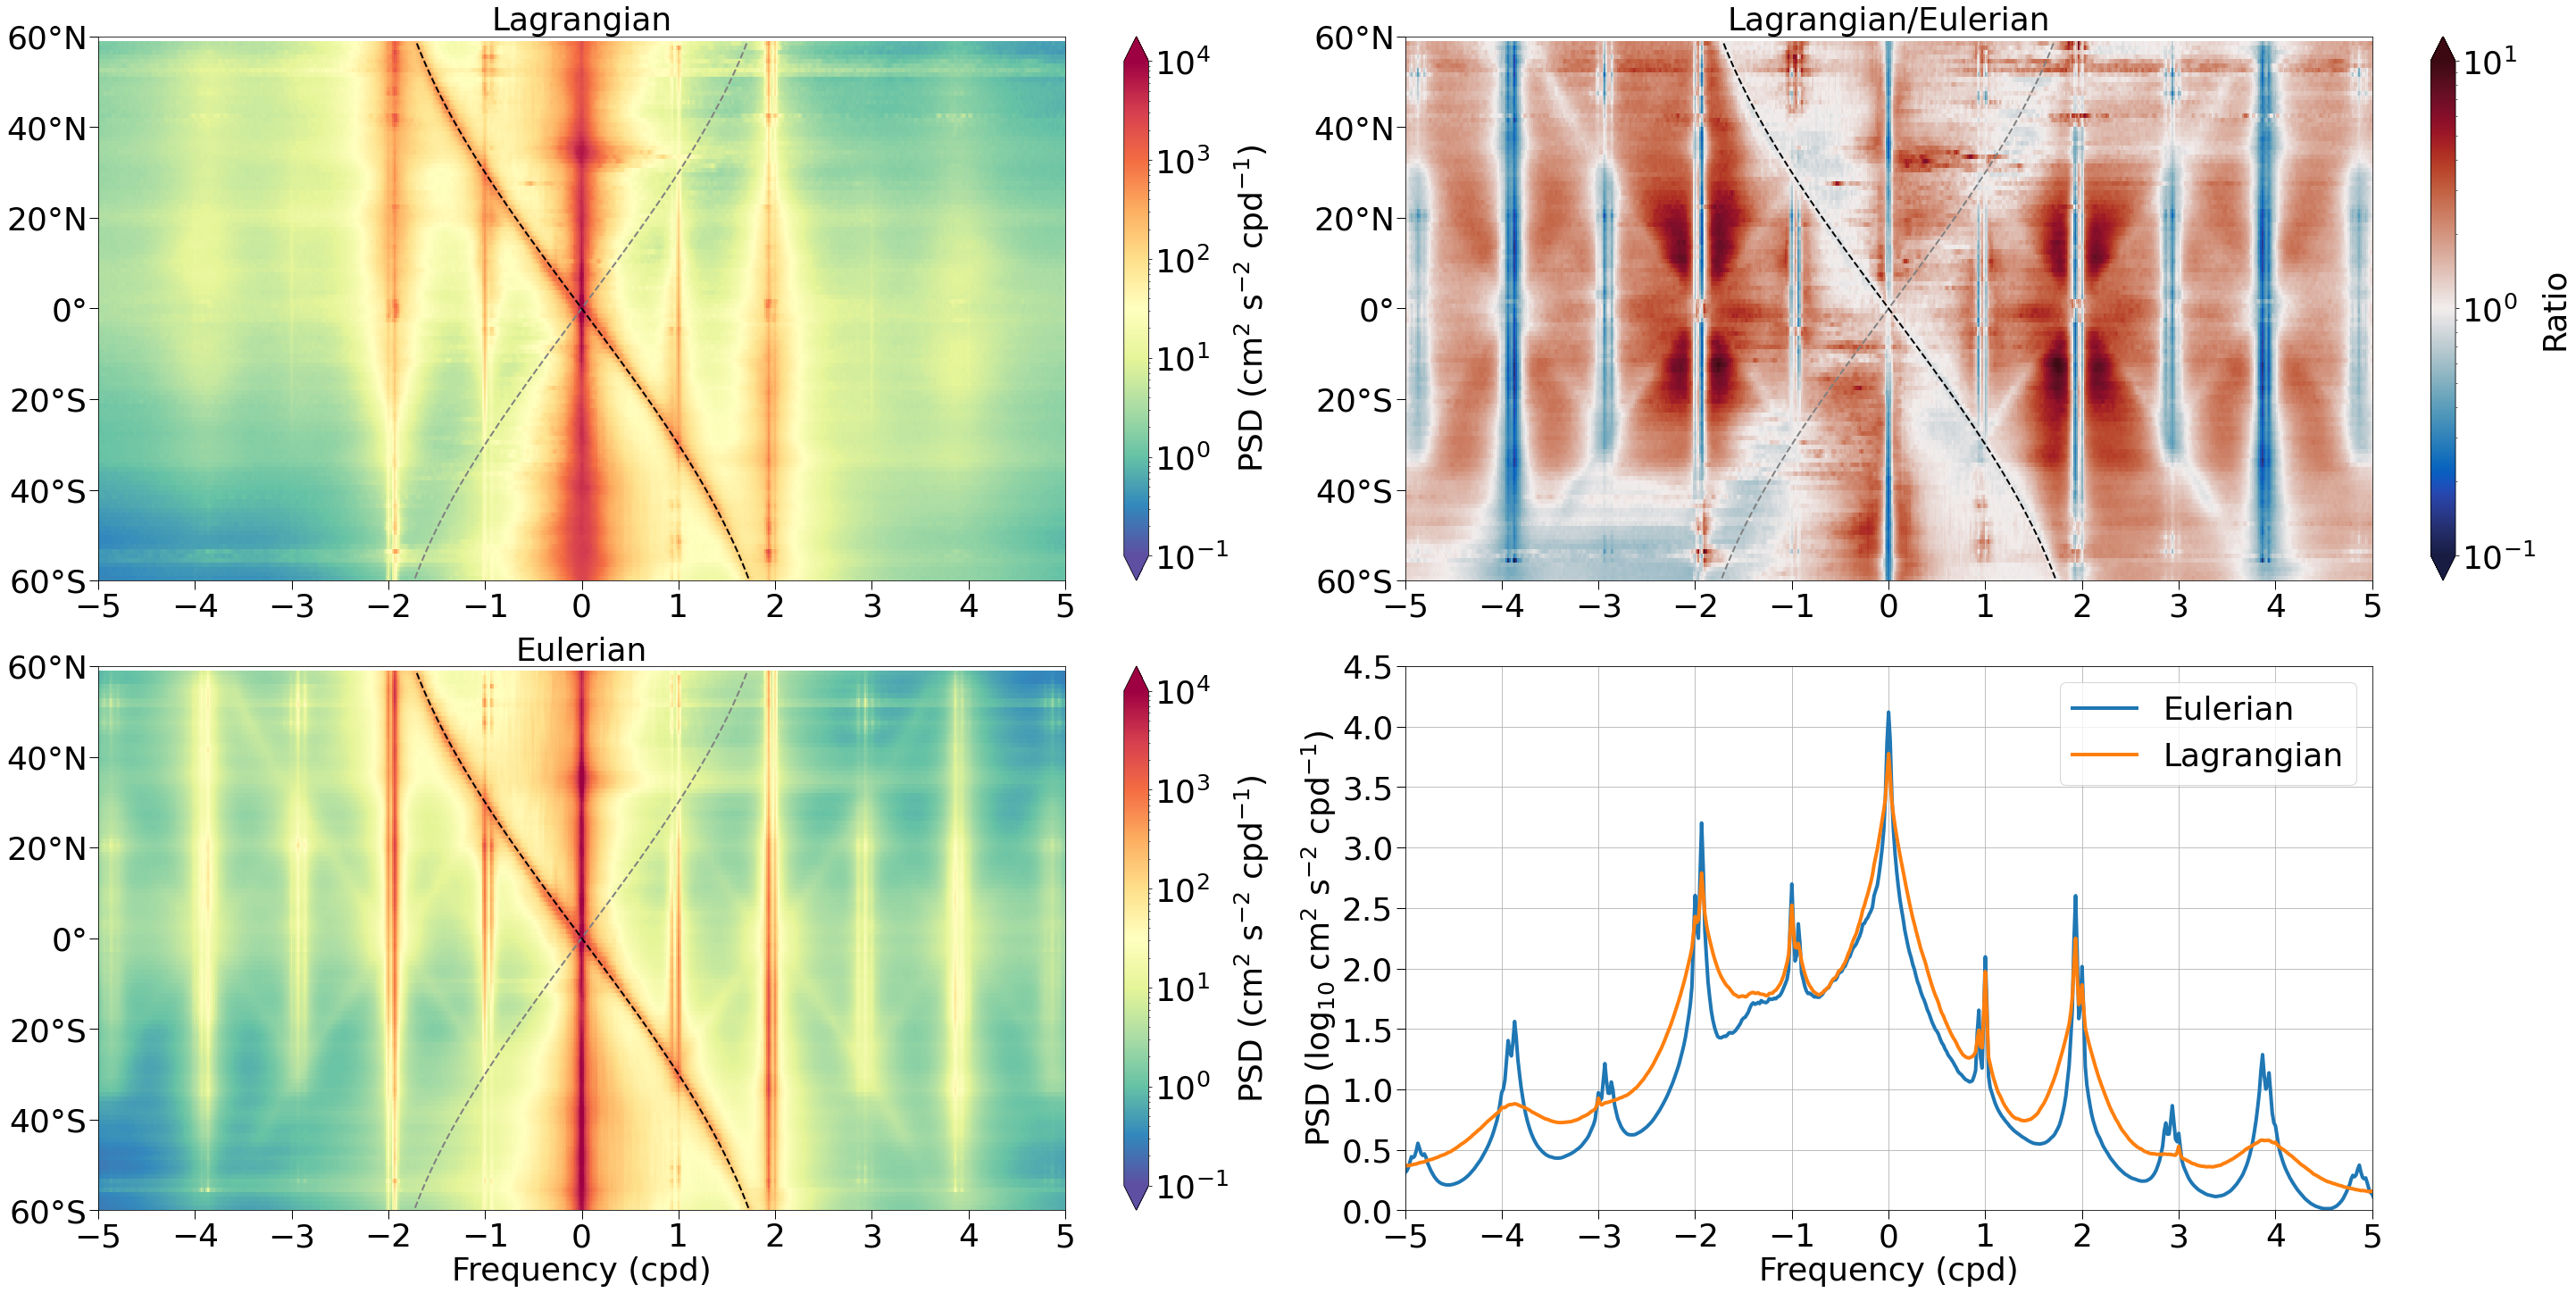

In [17]:
# detrended spectra
line_width = 2
font_size = 36
fig, ax = plt.subplots(figsize=(40,20),constrained_layout=True)

# LLC420 Lagrangian
ax = plt.subplot(2,2,1)
cax = (ds_nomean['E_Lagrangian']*86400/6).plot.pcolormesh(ax=ax, x='frequency', y='lat_bins', cmap = 'Spectral_r', norm=colors.LogNorm(vmin=1e-1, vmax=1e4), add_colorbar = False)
# colorbar
cbar = plt.colorbar(cax, ax=ax, extend='both', orientation='vertical')
cbar.ax.tick_params(labelsize=font_size)
cbar.set_label('PSD (cm$^2$ s$^{-2}$ cpd$^{-1}$)', fontsize=font_size)
# x,y ticks
ax.set_xticks(list(ax.get_xticks()) + [-4., -3., -2., -1., 1., 2., 3., 4.])
ax.set_xlim(-5., 5.)
ax.set_ylim(-60., 60.)
ax.set_yticks([-60., -40., -20., 0., 20., 40., 60.])
#ax.set_yticklabels(['60S','40S','20S','0','20N','40N','60N'])
ax.set_yticklabels(['$60\degree$S','$40\degree$S','$20\degree$S','$0\degree$','$20\degree$N','$40\degree$N','$60\degree$N'])
ax.set_ylabel('',fontsize=font_size)
ax.set_xlabel('',fontsize=font_size)
ax.tick_params(labelsize=font_size)
# add coriolis frequency
ax.set_title('Lagrangian',fontsize=font_size)
ax.tick_params(direction='out', length=10, width=1)
ax.plot(f*86400./2./np.pi,f.lat_bins,'--',color='grey',linewidth=line_width)
ax.plot(-f*86400./2./np.pi,f.lat_bins,'--',color='black',linewidth=line_width)

# LLC4320 Eulerian
ax = plt.subplot(2,2,3)
cax = (ds_nomean['E_Eulerian']*86400/6).plot.pcolormesh(ax=ax, x='frequency', y='lat_bins', cmap = 'Spectral_r', norm=colors.LogNorm(vmin=1e-1, vmax=1e4), add_colorbar = False)
# colorbar
cbar = plt.colorbar(cax, ax=ax, extend='both', orientation='vertical')
cbar.ax.tick_params(labelsize=font_size)
cbar.set_label('PSD (cm$^2$ s$^{-2}$ cpd$^{-1}$)', fontsize=font_size)
# x,y ticks
ax.set_xticks(list(ax.get_xticks()) + [-4., -3., -2., -1., 1., 2., 3., 4.])
ax.set_xlim(-5., 5.)
ax.set_ylim(-60., 60.)
ax.set_yticks([-60., -40., -20., 0., 20., 40., 60.])
#ax.set_yticklabels(['60S','40S','20S','0','20N','40N','60N'])
ax.set_yticklabels(['$60\degree$S','$40\degree$S','$20\degree$S','$0\degree$','$20\degree$N','$40\degree$N','$60\degree$N'])
ax.set_ylabel('',fontsize=font_size)
ax.set_xlabel('Frequency (cpd)',fontsize=font_size)
ax.tick_params(labelsize=font_size)
ax.set_title('Eulerian',fontsize=font_size)
ax.tick_params(direction='out', length=10, width=1)
ax.plot(f*86400./2./np.pi,f.lat_bins,'--',color='grey',linewidth=line_width)
ax.plot(-f*86400./2./np.pi,f.lat_bins,'--',color='black',linewidth=line_width)

# Ratio
ax = plt.subplot(2,2,2)
cax = (ds_nomean['E_Lagrangian']/ds_nomean['E_Eulerian']).plot.pcolormesh(ax=ax, x='frequency', y='lat_bins', cmap=cm.balance, norm=colors.LogNorm(vmin=1e-1, vmax=1e1), add_colorbar = False)
# colorbar
cbar = plt.colorbar(cax, ax=ax, extend='both', orientation='vertical')
cbar.ax.tick_params(labelsize=font_size)
cbar.set_label('Ratio', fontsize=font_size)
# x,y ticks
ax.set_xticks(list(ax.get_xticks()) + [-4., -3., -2., -1., 1., 2., 3., 4.])
ax.set_xlim(-5., 5.)
ax.set_ylim(-60., 60.)
ax.set_yticks([-60., -40., -20., 0., 20., 40., 60.])
ax.set_yticklabels(['$60\degree$S','$40\degree$S','$20\degree$S','$0\degree$','$20\degree$N','$40\degree$N','$60\degree$N'])
ax.set_ylabel('',fontsize=font_size)
ax.set_xlabel('',fontsize=font_size)
ax.tick_params(labelsize=font_size)
ax.set_title('Lagrangian/Eulerian',fontsize=font_size)
ax.tick_params(direction='out', length=10, width=1)
ax.plot(f*86400./2./np.pi,f.lat_bins,'--',color='grey',linewidth=line_width)
ax.plot(-f*86400./2./np.pi,f.lat_bins,'--',color='black',linewidth=line_width)

labels = ['Eulerian', 'Lagrangian']
ax = plt.subplot(2,2,4)
(np.log10((E_E_uv_mean+E_E_uv_mean_2)*86400/2/6)).plot(ax=ax,label=labels[0],linewidth=4)
(np.log10((E_L_bin_uv_mean+E_L_bin_uv_mean_2)*86400/2/6)).plot(ax=ax,label=labels[1],linewidth=4)
ax.grid()
ax.legend()
ax.set_xlim([-5.,5.])
ax.set_xticks([-5, -4, -3, -2, -1, 0., 1., 2., 3., 4., 5.])
ax.set_ylim([0,4.5])
ax.set_yticks([ 0., 0.5, 1., 1.5, 2., 2.5, 3., 3.5, 4.,4.5])
ax.legend(prop={'size': font_size})
ax.set_ylabel('PSD (log$_{10}$ cm$^2$ s$^{-2}$ cpd$^{-1}$)',fontsize=font_size)
ax.set_xlabel('Frequency (cpd)',fontsize=font_size)
ax.tick_params(labelsize=font_size)
ax.tick_params(direction='out', length=10, width=1)

plt.savefig('/home1/datahome/xyu/equinox_working/Lagrangian_vs_Eulerian_LLC4320/Figures/Rotary_spectra_LLC_comparison_detrend_together.png')

In [20]:
cluster.close()